In [8]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
!pip install geoplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
##Install and import all the required packages in Pythonpackages for the Python Project.
#import geoplot as gplt
import geopandas as gpd

In [11]:
#import geoplot.crs as gcrs
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np
import imageio

In [12]:
#connecting to the google drive and getting the data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# Read spatial data as shapefile- Karnataka Districts
Kar = gpd.read_file('/content/drive/MyDrive/W23-GEOG271/COVID Modelling/Kar_Districts/Karnataka_dist_final.shp')
Kar.head()

ERROR:fiona._env:/content/drive/MyDrive/W23-GEOG271/COVID Modelling/Kar_Districts/Karnataka_dist_final.shp: No such file or directory


DriverError: ignored

In [14]:
Kar.shape


NameError: ignored

In [ ]:
Kar.describe

In [17]:
# Basic plot,
Kar.plot()
<matplotlib.axes._subplots.AxesSubplot at 0x7ff80a4164f0>

SyntaxError: ignored

In [30]:
# Individual district plot
Kar[Kar.Dist_Name =="Bidar"].plot()

NameError: ignored

In [29]:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   KeyID       30 non-null     int64   
 1   OBJECTID    30 non-null     int64   
 2   Shape_Leng  30 non-null     float64 
 3   Shape_Area  30 non-null     float64 
 4   Dist_numbe  30 non-null     int64   
 5   Dist_Name   30 non-null     object  
 6   Cases       30 non-null     float64 
 7   Population  30 non-null     float64 
 8   Elderly     30 non-null     float64 
 9   NDVI        30 non-null     float64 
 10  geometry    30 non-null     geometry
dtypes: float64(6), geometry(1), int64(3), object(1)
memory usage: 2.7+ KB

SyntaxError: ignored

In [28]:
# Plot by Dist_name, Random colors
Kar.plot(column='Dist_Name')

NameError: ignored

In [27]:
## Standard Map layout with legend

ax = Kar.plot(column = Kar.Dist_Name,
            cmap = 'OrRd',
            figsize =(25,14),
            legend = True,
            #legend_kwds ={'label': "COVID-19 cases", 'orientation' : "vertical"},
            edgecolor = 'black')
            #linewidth = 0.8) 

NameError: ignored

NameError: ignored

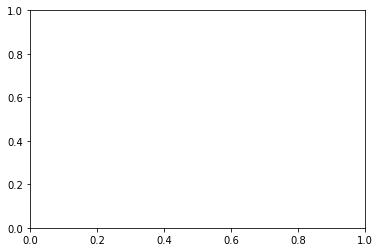

In [26]:
#Plot Dist name with an accurate legend
fig, ax = plt.subplots(1, 1)

Kar.plot(column='Dist_Name', ax=ax, legend=True)

In [25]:
#  Resize figure and adjusting Map layout the axes
ax = Kar.plot(column =('Cases'),
                 cmap = 'Reds',
                 figsize =(40,14),
                 ax=ax[0,0],
                 legend = True,
                 edgecolor = 'black',
                 linewidth = 0.5)
ax.set_title ('Total COVID19 Cases in Karnataka, '+ (('Cases') + ' in 2020'), fontdict= 
                 {'fontsize': 15}, pad = 12.5)

NameError: ignored

In [24]:
#  Resize figure and adjusting Map layout the axes
ax = Kar.plot(column =('Population'),
                 cmap = 'Blues',
                 figsize =(40,14),
                 ax=ax[0,1],
                 legend = True,
                 edgecolor = 'black',
                 linewidth = 0.5)
ax.set_title ('Total Population in Karnataka, '+ (('Population') + ' in 2020'), fontdict= 
                 {'fontsize': 15}, pad = 12.5)

NameError: ignored

NameError: ignored

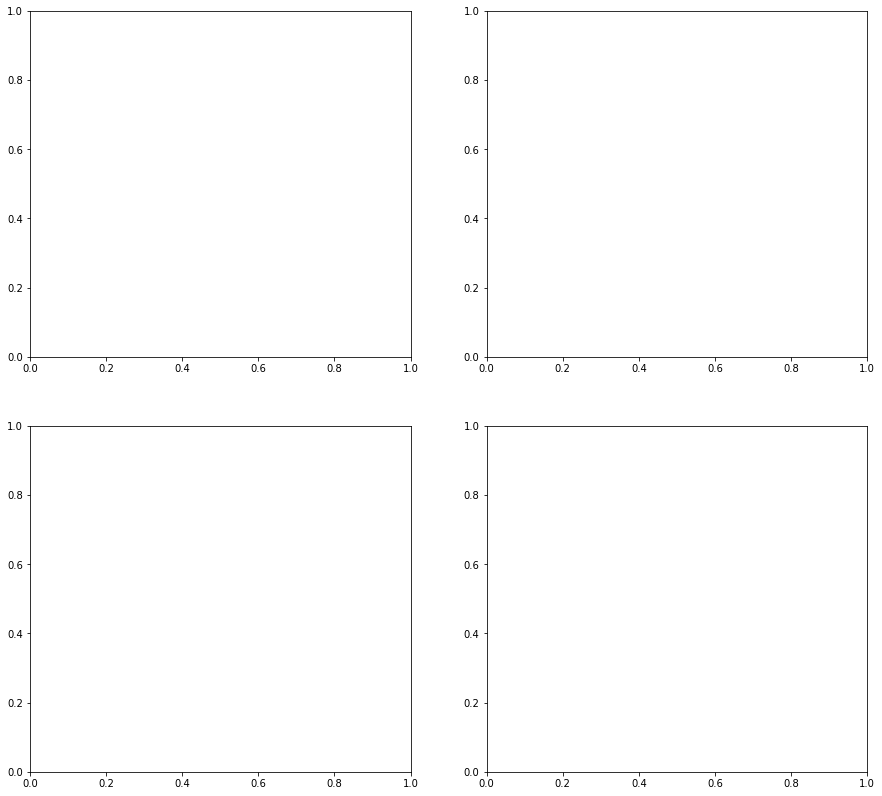

In [23]:
fig, ax = plt.subplots(2, 2, figsize=(15, 14))
Kar.plot('Cases', ax=ax[0,0], cmap = 'Blues', edgecolor = 'black', linewidth = 0.3, legend=True)
ax[0,0].set_title("2020 COVID 19 Cases")
Kar.plot('Population', ax=ax[0,1], cmap = 'Blues', edgecolor = 'black', linewidth = 0.3, legend=True)
ax[0,1].set_title("Population")
Kar.plot('Elderly', ax=ax[1,0], cmap = 'Blues', edgecolor = 'black', linewidth = 0.3, legend=True)
ax[1,0].set_title("2020 Elderly Population")
Kar.plot('NDVI', ax=ax[1,1], cmap = 'Blues', edgecolor = 'black', linewidth = 0.3, legend=True, vmax=1)
ax[1,1].set_title("NDVI")

ax[0,0].set_yticks([])
ax[0,1].set_yticks([])
ax[1,0].set_yticks([])
ax[1,1].set_yticks([])
ax[0,0].set_xticks([])
ax[0,1].set_xticks([])
ax[1,0].set_xticks([])
ax[1,1].set_xticks([])

In [22]:
#Number of cases per sq foot by census tract
from shapely.geometry import Polygon, LineString, Point

print(Kar.crs)

#EPSG:4326 has lat and lon in degree. Lets change it to Feet
s = Kar.to_crs("EPSG:6565")
print(s.crs)
#calculating area and adding it to the orighical geodataframe
Kar["area_ft"] = s.area

#tree density
Kar["cases_density"] = Kar["Cases"]/Kar["area_ft"]

NameError: ignored

NameError: ignored

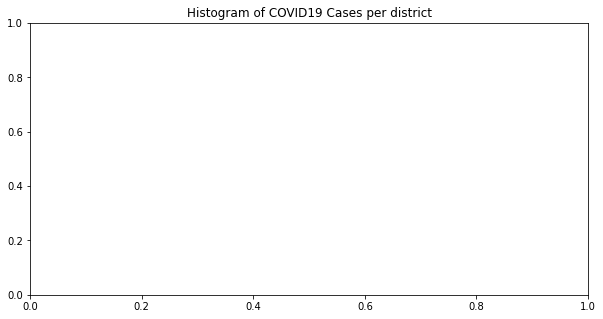

In [20]:
#plotting histogram
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_title("Histogram of COVID19 Cases per district")

ax = Kar.cases_density.hist(bins=30)
ax.set_xlabel("Cases per square area")
fig.show()

In [21]:
#Clipping the variables that will be used in the modelling based on the influence in the modelling
Kar_subset = Kar[['Population', 'Cases', 'Elderly', 'NDVI','geometry']]
Kar_subset.head()

NameError: ignored

In [31]:
#Running the correction model
plt.imshow(Kar_subset.corr())
plt.xticks(range(len(Kar_subset.corr())), Kar_subset.corr().columns, rotation='vertical')
plt.yticks(range(len(Kar_subset.corr())), Kar_subset.corr().columns)
plt.title("Correlation of COVID19 cases with Population, Elderly and NDVI", fontsize = 14, pad=20)
plt.colorbar();

NameError: ignored

In [32]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [33]:
data = pd.read_csv('/content/drive/MyDrive/W23-GEOG271/COVID Modelling/covid.csv')
data.head()

FileNotFoundError: ignored

In [34]:
#importing library
import matplotlib.pyplot as plt
#datasets

#scatter plot for the dataset
plt.scatter(data['Cases'], data['Population'])
plt.show()


NameError: ignored

NameError: ignored

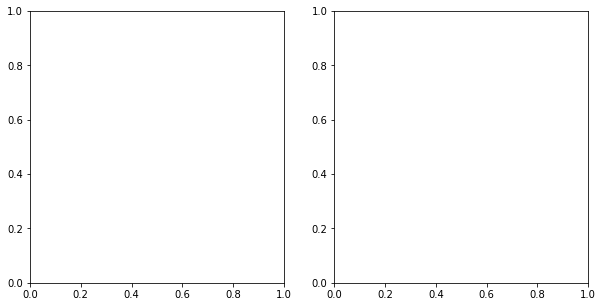

In [35]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
heat.plot("num_trees", "HVI_SCORE", kind="scatter",ax=ax[0])
ax[0].set_xlabel("number of trees per census tract")
ax[0].set_ylabel("Heat Vulnerability Index")
heat.plot("ave_dbh", "HVI_SCORE", kind="scatter", ax=ax[1])
ax[1].set_xlabel("average diameter of trees")
ax[1].set_ylabel("Heat Vulnerability Index")
ax[0].set_title('Trees per Census Tract')
ax[1].set_title('Average Diameter of Trees per Census Tract')


fig.show()